# Importing the required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_36ad0c7df7434dab8509aaae88ab9ff7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Wy_YhSK5A0a7ZSa41ZLE8ptNiVs6zrZXvnr-PttFmqbD',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_36ad0c7df7434dab8509aaae88ab9ff7.get_object(Bucket='universityadmissionpredictionmode-donotdelete-pr-3sorswkk6bqe2r',Key='Admission_Predict.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.drop(["Serial No."], axis=1, inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Analysing the Dataset

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [8]:
# Getting the size of the dataset

print('No of Rows in the dataset : ',{data.shape[0]})
print('No of Columns in the dataset : ',{data.shape[1]})

No of Rows in the dataset :  {400}
No of Columns in the dataset :  {8}


### Statistical summery of the data set

In [3]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


## Checking for Missing Values

In [5]:
data.isnull().any() 

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

## Data Correlation

In [9]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


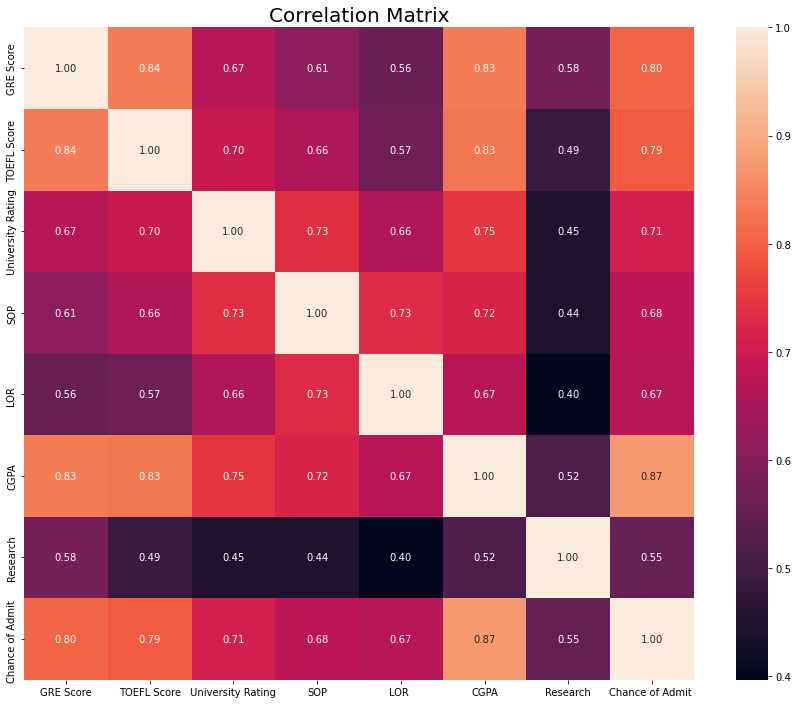

In [10]:
#plotting the correlation matrix as a heatmap

corr_matrix = data.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

## Data Visualization

### Univariate Analysis

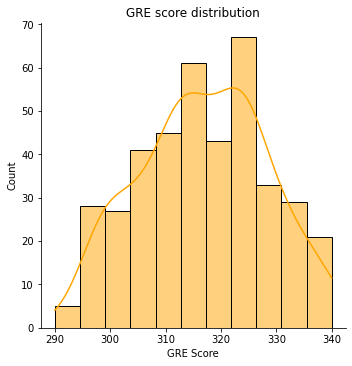

In [11]:
sns.displot(x=data["GRE Score"], kde=True, color='orange')
plt.title("GRE score distribution");

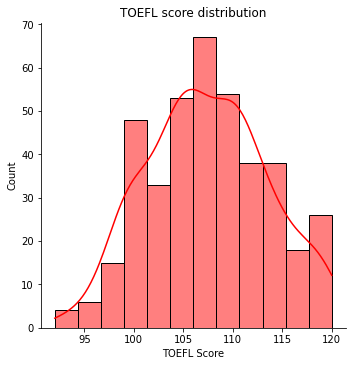

In [12]:
sns.displot(x=data["TOEFL Score"], kde=True, color='red')
plt.title("TOEFL score distribution");

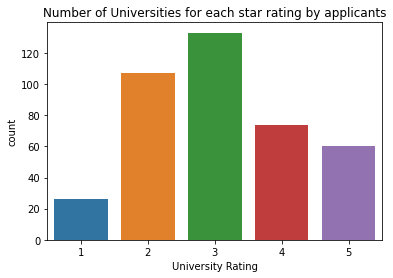

In [13]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

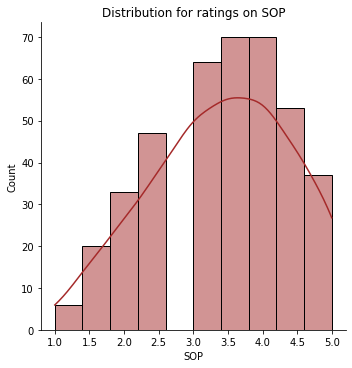

In [14]:
sns.displot(x=data["SOP"], kde=True, color='brown');
plt.title("Distribution for ratings on SOP");

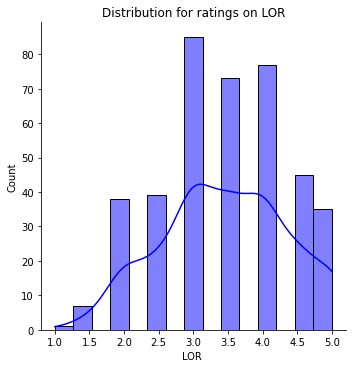

In [15]:
sns.displot(x=data["LOR "], kde=True, color='blue');
plt.title("Distribution for ratings on LOR");

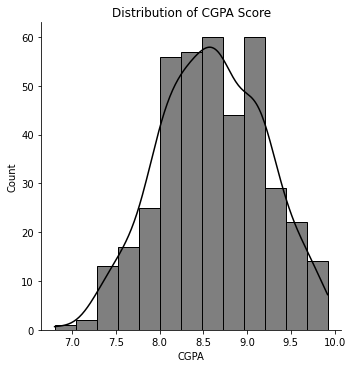

In [16]:
sns.displot(x=data["CGPA"], kde=True, color='black');
plt.title("Distribution of CGPA Score");

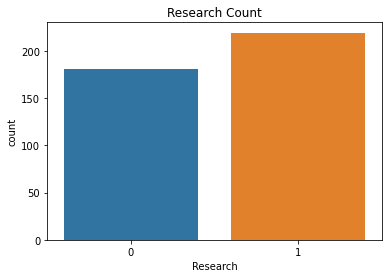

In [17]:
sns.countplot(x=data["Research"]);
plt.title("Research Count");

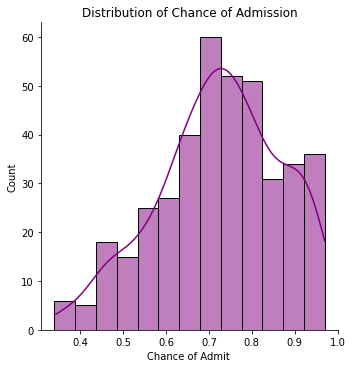

In [18]:
sns.displot(x=data["Chance of Admit "], kde=True, color='purple');
plt.title("Distribution of Chance of Admission");

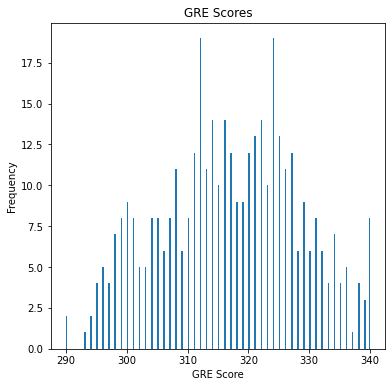

In [19]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

### Bivariate Analysis

### Plotting data which have high correlation

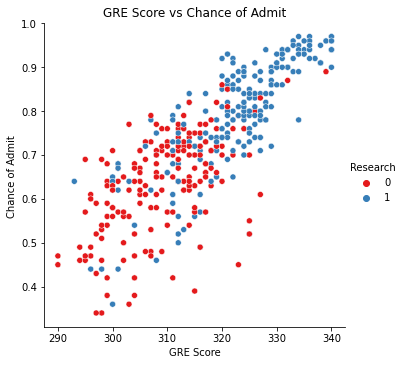

In [20]:
sns.relplot(data=df,x="GRE Score",y="Chance of Admit ",hue="Research", palette="Set1")
plt.title("GRE Score vs Chance of Admit")
plt.show()

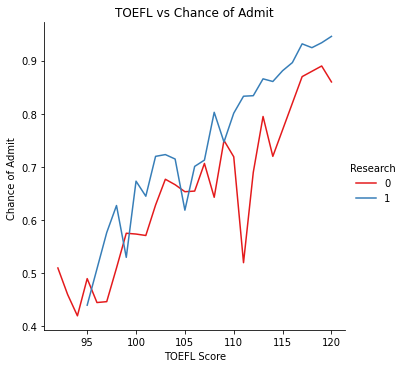

In [21]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit ",hue="Research",kind="line",ci=None, palette="Set1")
plt.title("TOEFL vs Chance of Admit")
plt.show()

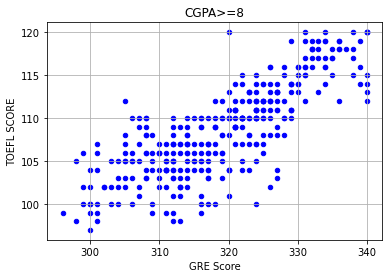

In [22]:
df[df.CGPA >= 8].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8")
plt.grid(True)
plt.show()

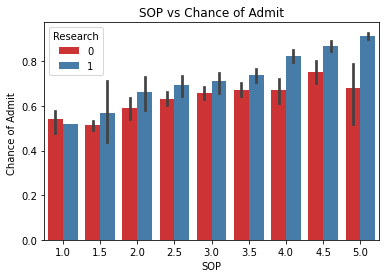

In [23]:
sns.barplot(data=df,x="SOP",y="Chance of Admit ", palette="Set1",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

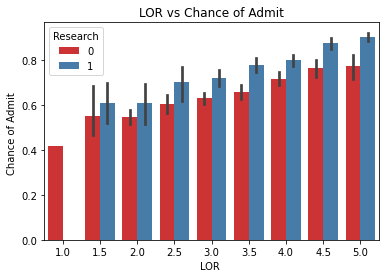

In [24]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit ", palette="Set1",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

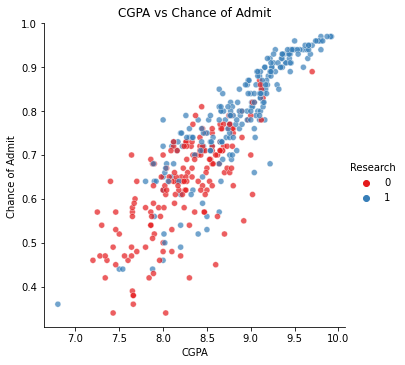

In [25]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit ",hue="Research", palette="Set1",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

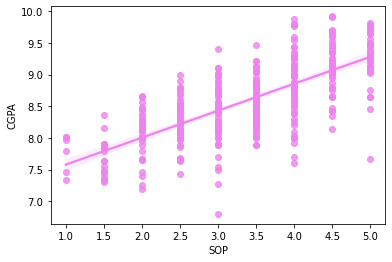

In [26]:
sns.regplot(data['SOP'],data['CGPA'],color='violet')

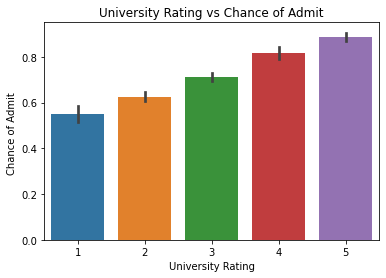

In [27]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit ")
plt.title("University Rating vs Chance of Admit")
plt.show()

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

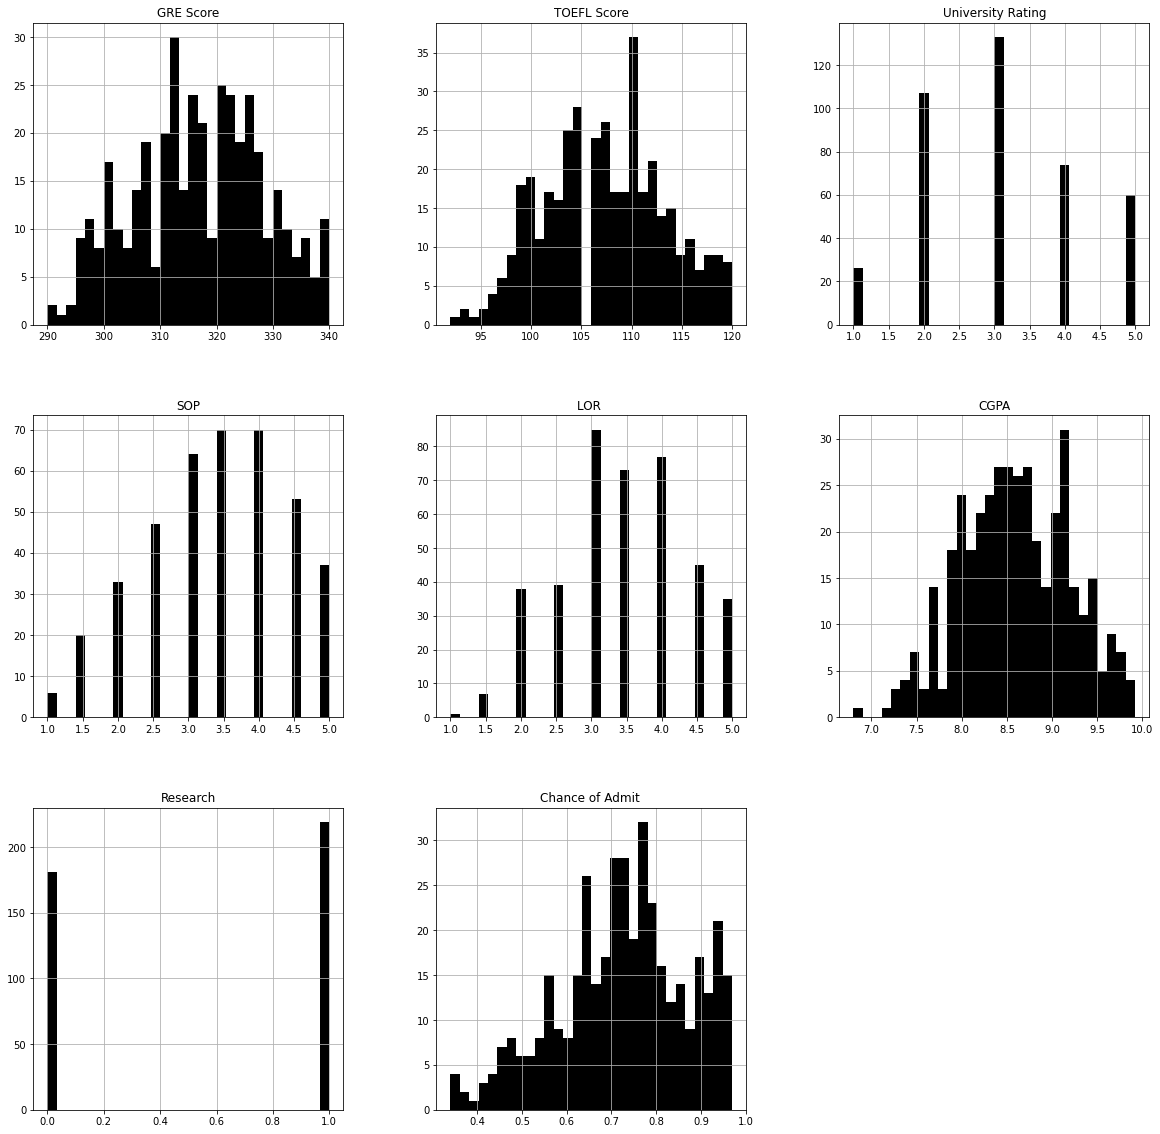

In [28]:
data.hist(bins = 30, figsize = (20,20), color = 'black')

### Multivariate Analysis

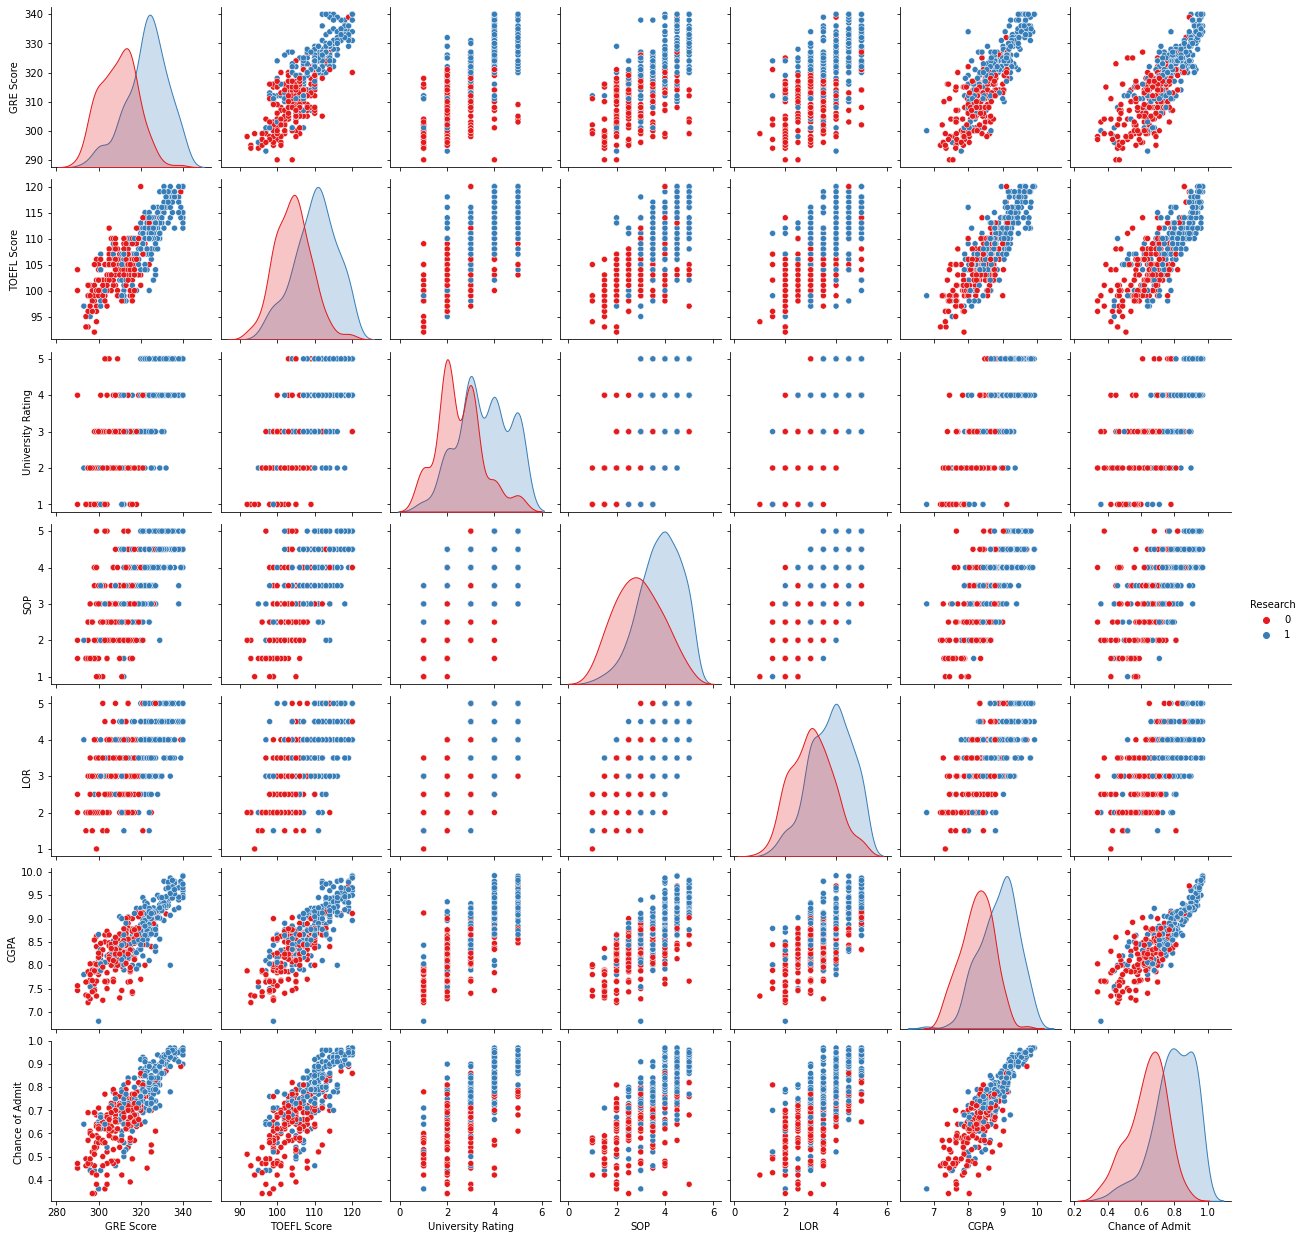

In [29]:
sns.pairplot(data,hue='Research', palette='Set1')

<function matplotlib.pyplot.show(close=None, block=None)>

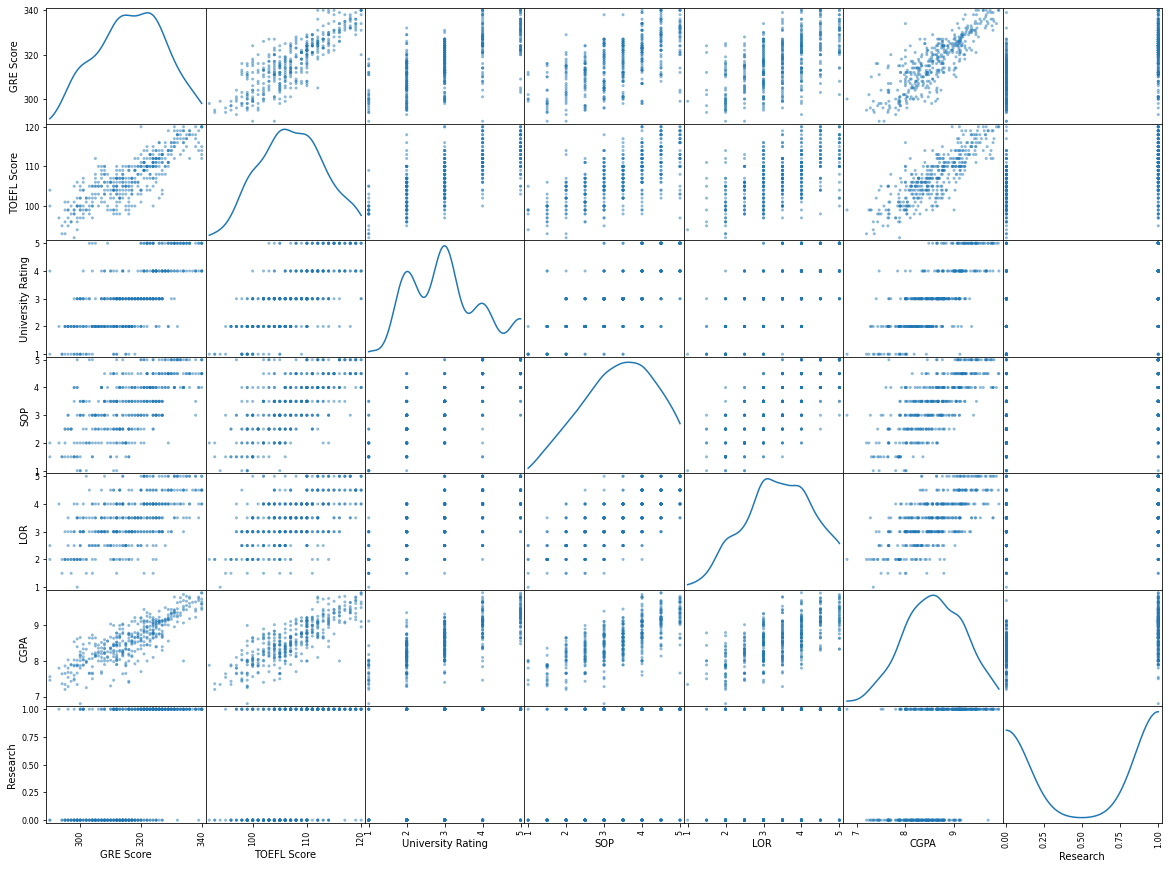

In [30]:
pd.plotting.scatter_matrix(data.loc[:,"GRE Score":"Research"],diagonal="kde",figsize=(20,15))
plt.show

## Importing the required libraries for regression analysis

In [31]:
import importlib.util
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Splitting Dependent and Independent Columns

In [32]:
x = data.iloc[:, :-1]
y = data['Chance of Admit ']

In [33]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [34]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

## Splitting the Data into Train and Test

In [39]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

## Scaling the data

In [41]:
scale = MinMaxScaler()

In [43]:
x_train[x_train.columns] = scale.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scale.transform(x_test[x_test.columns])

In [44]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
145,0.60,0.750000,0.25,0.250,0.375,0.589744,1.0
387,0.34,0.464286,0.25,0.250,0.625,0.416667,0.0
44,0.72,0.750000,1.00,0.875,0.750,0.833333,1.0
138,0.72,0.857143,0.25,0.875,0.500,0.730769,1.0
43,0.84,0.892857,0.75,0.875,0.750,0.737179,0.0


In [45]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
146,0.50,0.464286,0.50,0.250,0.375,0.538462,0.0
332,0.36,0.500000,0.50,0.625,0.375,0.451923,1.0
67,0.52,0.535714,0.25,0.625,0.625,0.589744,1.0
362,0.96,0.821429,1.00,0.875,1.000,0.778846,1.0
102,0.48,0.500000,0.25,0.750,0.625,0.464744,0.0


# Model Building

## Gradient Boosting Regression

In [46]:
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [47]:
model.score(x_test,y_test)

0.6416493711807993

In [50]:
y_predict=model.predict(x_test)

In [51]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.05418653653435155
Mean Squared Error: 0.005391110848384686
Root Mean Squared Error: 0.07342418435627791


## Logistic Regression

In [52]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [53]:
from sklearn.linear_model._logistic import LogisticRegression
lore = LogisticRegression(random_state=0, max_iter=1000)
lr_model = lore.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

## Model Evaluation

In [24]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.95
Recall Score: 0.9615384615384616
ROC AUC Score: 0.7307692307692308
Confussion Matrix:
 [[ 1  1]
 [ 3 75]]


## Save the Model

In [25]:
# import pickle

# pickle.dump(lr, open("university.pkl", 'wb'))
# model = pickle.load(open("university.pkl", 'rb'))

# IBM Deployement

In [26]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 23.6 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.255
    Uninstalling ibm-watson-machine-learning-1.0.255:
      Successfully uninstalled ibm-watson-machine-learning-1.0.255


In [27]:
from ibm_watson_machine_learning import APIClient
import json

In [28]:
wml_credentials = {
    "apikey":"dAkQTmsJ7sfRzutZ8fTcNbHZvKD_ZyoxqjtYF7h8VwC7",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [29]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------  ------------------------
ID                                    NAME      CREATED
685cc987-da22-47b2-9153-1e2213f99582  univ_adm  2022-10-19T16:33:15.176Z
------------------------------------  --------  ------------------------


In [30]:
SPACE_ID = "685cc987-da22-47b2-9153-1e2213f99582"
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [31]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

# Save and Deploy the Model

In [32]:
import sklearn
sklearn.__version__

'1.0.2'

In [33]:
MODEL_NAME = 'univ_ad'
DEPLOYMENT_NAME = 'iris_adm'
DEMO_MODEL = lr_model

In [34]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)


model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-10-21T03:45:17.033Z',
  'id': 'f54c5676-dfa0-4925-b6e6-06199c369c98',
  'modified_at': '2022-10-21T03:45:20.450Z',
  'name': 'univ_ad',
  'owner': 'IBMid-66300412RK',
  'resource_key': '159055c6-6ce1-471a-adb5-5ff5a7261082',
  'space_id': '685cc987-da22-47b2-9153-1e2213f99582'},
 'system': {'warnings': []}}

In [35]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'f54c5676-dfa0-4925-b6e6-06199c369c98'

In [36]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'f54c5676-dfa0-4925-b6e6-06199c369c98' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9f4939ed-7f21-4881-8ae4-234e7515f65a'
------------------------------------------------------------------------------------------------


